In [1]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import  SMOTE
import pickle

In [3]:
NUM_ROWS = 50_000
DATA_PATH = "/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic"
attack_files = {
    "DDoS_TCP_SYN_Flood_attack.csv": "DDoS",
    "DDoS_UDP_Flood_attack.csv": "DDoS",
    "DDoS_ICMP_Flood_attack.csv": "DDoS",
    "MITM_attack.csv": "MITM",
    "Port_Scanning_attack.csv": "Scanning",
    "SQL_injection_attack.csv": "Injection",
    "XSS_attack.csv": "XSS",
    "Password_attack.csv": "Password",
    "/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Normal traffic/Distance/Distance.csv": "Normal"
}

dataframes = []

for file_name, attack_type in attack_files.items():
    if file_name.startswith("/kaggle"):
        file_path = file_name
    else:
        file_path = f"{DATA_PATH}/{file_name}"
    
    print(f"🔄  {file_name} ({attack_type})")
    
    df = pd.read_csv(file_path)

    sampled_df = df.sample(n=min(NUM_ROWS, len(df)), random_state=42)
    
    sampled_df["attack_type"] = attack_type
    
    dataframes.append(sampled_df)

merged_df = pd.concat(dataframes, ignore_index=True)

merged_df.to_csv("merged_attacks_100k_each.csv", index=False)

print("✅ : merged_attacks_50k_each.csv")


🔄  DDoS_TCP_SYN_Flood_attack.csv (DDoS)


/tmp/ipykernel_237/637434196.py:25: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


🔄  DDoS_UDP_Flood_attack.csv (DDoS)


/tmp/ipykernel_237/637434196.py:25: DtypeWarning: Columns (2,3,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


🔄  DDoS_ICMP_Flood_attack.csv (DDoS)


/tmp/ipykernel_237/637434196.py:25: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


🔄  MITM_attack.csv (MITM)
🔄  Port_Scanning_attack.csv (Scanning)
🔄  SQL_injection_attack.csv (Injection)
🔄  XSS_attack.csv (XSS)
🔄  Password_attack.csv (Password)


/tmp/ipykernel_237/637434196.py:25: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


🔄  /kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Normal traffic/Distance/Distance.csv (Normal)


/tmp/ipykernel_237/637434196.py:25: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


✅ : merged_attacks_50k_each.csv


In [4]:
merged_df.shape

(339708, 64)

In [5]:
merged_df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type,attack_type
0,2021 19:05:15.192579000,192.168.0.128,148.211.207.46,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_TCP,DDoS
1,2021 19:03:44.605842000,192.168.0.128,112.159.11.36,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_TCP,DDoS
2,2021 19:04:45.420353000,192.168.0.128,245.115.31.31,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_TCP,DDoS
3,2021 19:05:20.333740000,192.168.0.128,187.135.10.23,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_TCP,DDoS
4,2021 19:04:26.437811000,192.168.0.128,90.251.27.174,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_TCP,DDoS


In [6]:
merged_df['attack_type'].value_counts()

attack_type
DDoS         150000
Password      50000
Injection     50000
Normal        50000
Scanning      22564
XSS           15915
MITM           1229
Name: count, dtype: int64

In [7]:
merged_df.columns

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

In [8]:
print(" Unique values in 'Attack_label':")
print(merged_df['Attack_label'].unique())

print("\nUnique values in 'Attack_type':")
print(merged_df['Attack_type'].unique())

print("\n Unique values in 'attack_type':")
print(merged_df['attack_type'].unique())


 Unique values in 'Attack_label':
[1 0]

Unique values in 'Attack_type':
['DDoS_TCP' 'DDoS_UDP' 'DDoS_ICMP' 'MITM' 'Port_Scanning' 'SQL_injection'
 'XSS' 'Password' 'Normal']

 Unique values in 'attack_type':
['DDoS' 'MITM' 'Scanning' 'Injection' 'XSS' 'Password' 'Normal']


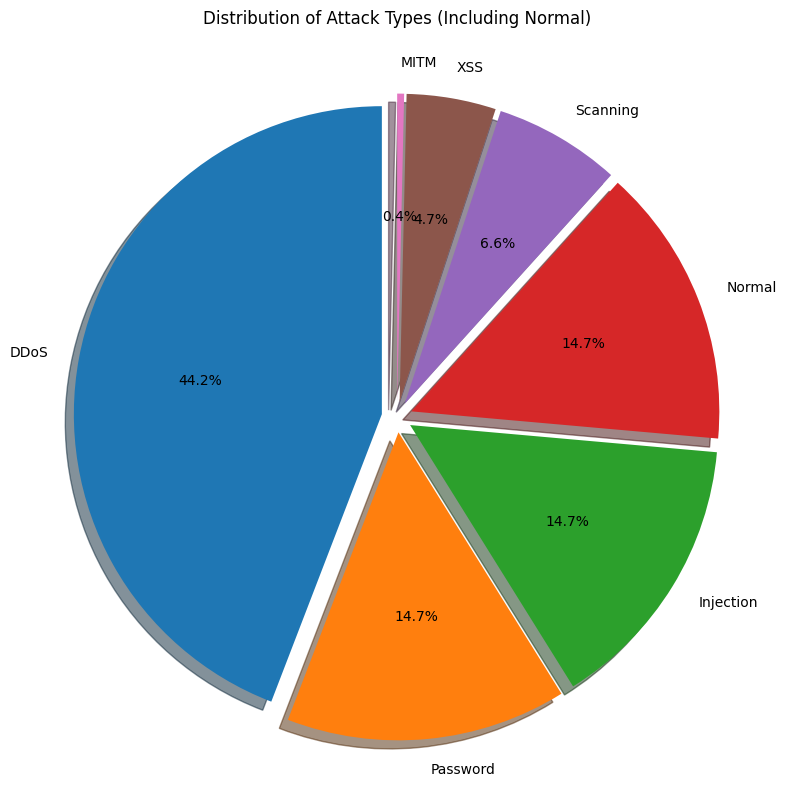

In [9]:
plt.figure(figsize=(35, 10))
merged_df['attack_type'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=merged_df['attack_type'].value_counts().index,
    explode=[0.05]*merged_df['attack_type'].nunique(),
    shadow=True
)
plt.title("Distribution of Attack Types (Including Normal)")
plt.ylabel("")  
plt.show()


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339708 entries, 0 to 339707
Data columns (total 64 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 339708 non-null  object 
 1   ip.src_host                339708 non-null  object 
 2   ip.dst_host                339708 non-null  object 
 3   arp.dst.proto_ipv4         339708 non-null  object 
 4   arp.opcode                 339708 non-null  float64
 5   arp.hw.size                339708 non-null  object 
 6   arp.src.proto_ipv4         339708 non-null  object 
 7   icmp.checksum              339708 non-null  object 
 8   icmp.seq_le                339708 non-null  object 
 9   icmp.transmit_timestamp    339708 non-null  float64
 10  icmp.unused                339708 non-null  float64
 11  http.file_data             339708 non-null  object 
 12  http.content_length        339708 non-null  float64
 13  http.request.uri.query     33

In [11]:
merged_df.describe()

,arp.opcode,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,tcp.connection.rst,tcp.connection.syn,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,339708.000000,339708.0,339708.0,339708.000000,339708.000000,339708.0,3.397080e+05,3.397080e+05,339708.000000,339708.000000,...,339708.000000,339708.0,339708.000000,339708.000000,339708.000000,339708.000000,339708.0,339708.0,339708.0,339708.000000
mean,0.007556,0.0,0.0,10.588753,0.025587,0.0,1.236952e+08,1.132159e+09,0.115361,0.179431,...,0.393785,0.0,0.188618,0.037467,0.075241,0.037467,0.0,0.0,0.0,0.852815
std,0.108940,0.0,0.0,117.722917,0.157899,0.0,4.017392e+08,1.285027e+09,0.319457,6.061873,...,2.929099,0.0,1.396768,0.385314,0.772185,0.385314,0.0,0.0,0.0,0.354291
min,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
50%,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000e+00,6.634386e+08,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
75%,0.000000,0.0,0.0,0.000000,0.000000,0.0,3.030000e+02,1.954474e+09,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,6.000000,0.0,0.0,1465.000000,1.000000,0.0,2.147424e+09,4.294947e+09,1.000000,1440.000000,...,30.000000,0.0,14.000000,4.000000,8.000000,4.000000,0.0,0.0,0.0,1.000000


In [12]:
merged_df.isnull().sum()

frame.time            0
ip.src_host           0
ip.dst_host           0
arp.dst.proto_ipv4    0
arp.opcode            0
                     ..
mbtcp.trans_id        0
mbtcp.unit_id         0
Attack_label          0
Attack_type           0
attack_type           0
Length: 64, dtype: int64

In [13]:
merged_df.dropna(inplace=True)

In [14]:
merged_df.duplicated().sum()

820

In [15]:
merged_df.drop_duplicates(inplace=True)

In [16]:
merged_df.duplicated().sum()

0

In [17]:
merged_df.drop(columns=["Attack_label", "attack_type"], inplace=True)


In [18]:
category_col = merged_df.select_dtypes(include=['object']).columns
category_col

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le',
       'http.file_data', 'http.request.uri.query', 'http.request.method',
       'http.referer', 'http.request.full_uri', 'http.request.version',
       'tcp.checksum', 'tcp.connection.fin', 'tcp.dstport', 'tcp.flags',
       'tcp.options', 'tcp.payload', 'tcp.srcport', 'udp.port',
       'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.msg',
       'mqtt.protoname', 'mqtt.topic', 'Attack_type'],
      dtype='object')

In [19]:
continuos_col =merged_df.select_dtypes(include=['int64', 'float64']).columns
continuos_col

Index(['arp.opcode', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.content_length', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.connection.rst', 'tcp.connection.syn',
       'tcp.connection.synack', 'tcp.flags.ack', 'tcp.len', 'tcp.seq',
       'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len',
       'dns.qry.qu', 'dns.qry.type', 'dns.retransmission',
       'dns.retransmit_request', 'dns.retransmit_request_in',
       'mqtt.conflag.cleansess', 'mqtt.len', 'mqtt.msg_decoded_as',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver',
       'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id'],
      dtype='object')

In [20]:
for feature in category_col:
    contingency_table = pd.crosstab(merged_df[feature], merged_df['Attack_type'])

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square Test for {feature}:")
    print("Chi-square statistic:", chi2)
    print("P-value:", p_value)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:")
    print(expected)
    print()
    Fail_feature=[]
    alpha = 0.05  
    if p_value < alpha:
        print("There is a significant relationship between the variables.")
    else:
        print(" There is no significant relationship between the variables.",Fail_feature.append(feature))


Chi-square Test for frame.time:
Chi-square statistic: 2711103.9999999995
P-value: 9.506654036432187e-72
Degrees of freedom: 2669592
Expected frequencies:
[[5.96067137e+01 5.96067137e+01 5.96055216e+01 ... 2.68993178e+01
  5.96067137e+01 1.89728170e+01]
 [8.85248224e-01 8.85248224e-01 8.85230519e-01 ... 3.99494818e-01
  8.85248224e-01 2.81774510e-01]
 [1.47541371e-01 1.47541371e-01 1.47538420e-01 ... 6.65824697e-02
  1.47541371e-01 4.69624183e-02]
 ...
 [1.47541371e-01 1.47541371e-01 1.47538420e-01 ... 6.65824697e-02
  1.47541371e-01 4.69624183e-02]
 [1.47541371e-01 1.47541371e-01 1.47538420e-01 ... 6.65824697e-02
  1.47541371e-01 4.69624183e-02]
 [1.47541371e-01 1.47541371e-01 1.47538420e-01 ... 6.65824697e-02
  1.47541371e-01 4.69624183e-02]]

There is a significant relationship between the variables.
Chi-square Test for ip.src_host:
Chi-square statistic: 949249.7632019003
P-value: 0.0
Degrees of freedom: 603528
Expected frequencies:
[[5.17870211e+02 5.17870211e+02 5.17859853e+02 ... 

In [21]:
label_encoder = LabelEncoder()

merged_df['Attack_type_encoded'] = label_encoder.fit_transform(merged_df['Attack_type'])

print("✅ Encoding Mapping:")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{class_label} --> {i}")

✅ Encoding Mapping:
DDoS_ICMP --> 0
DDoS_TCP --> 1
DDoS_UDP --> 2
MITM --> 3
Normal --> 4
Password --> 5
Port_Scanning --> 6
SQL_injection --> 7
XSS --> 8


In [22]:
merged_df.columns

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len

In [23]:
merged_df.drop(columns=["Attack_type"], inplace=True)

In [24]:
continuos =merged_df.select_dtypes(include=['int64', 'float64']).columns
continuos

Index(['arp.opcode', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.content_length', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.connection.rst', 'tcp.connection.syn',
       'tcp.connection.synack', 'tcp.flags.ack', 'tcp.len', 'tcp.seq',
       'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len',
       'dns.qry.qu', 'dns.qry.type', 'dns.retransmission',
       'dns.retransmit_request', 'dns.retransmit_request_in',
       'mqtt.conflag.cleansess', 'mqtt.len', 'mqtt.msg_decoded_as',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver',
       'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_type_encoded'],
      dtype='object')

In [25]:
Fail_feature = []

for feature in continuos_col:
    categories = merged_df[feature].unique()
    
   
    samples = [
        merged_df[merged_df[feature] == category]['Attack_type_encoded']
        for category in categories
        if len(merged_df[merged_df[feature] == category]) > 1
    ]

    if len(samples) >= 2: 
        f_statistic, p_value = f_oneway(*samples)

        print(f"ANOVA for {feature}:")
        print("F-statistic:", f_statistic)
        print("P-value:", p_value)
        print()

        alpha = 0.05
        if p_value < alpha:
            print("✅ There is a significant relationship between the variables.")
        else:
            print("❌ There is no significant relationship between the variables.")
            Fail_feature.append(feature)
    else:
        print(f"⚠️ Skipping {feature} (Not enough valid samples for ANOVA)")
        Fail_feature.append(feature)


ANOVA for arp.opcode:
F-statistic: 565.2258834758512
P-value: 0.0

✅ There is a significant relationship between the variables.
⚠️ Skipping icmp.transmit_timestamp (Not enough valid samples for ANOVA)
⚠️ Skipping icmp.unused (Not enough valid samples for ANOVA)
ANOVA for http.content_length:
F-statistic: 754.7539299522348
P-value: 0.0

✅ There is a significant relationship between the variables.
ANOVA for http.response:
F-statistic: 10874.612660181065
P-value: 0.0

✅ There is a significant relationship between the variables.
⚠️ Skipping http.tls_port (Not enough valid samples for ANOVA)
ANOVA for tcp.ack:
F-statistic: 2123.319496394684
P-value: 0.0

✅ There is a significant relationship between the variables.
ANOVA for tcp.ack_raw:
F-statistic: 12.88449503803986
P-value: 0.0

✅ There is a significant relationship between the variables.
ANOVA for tcp.connection.rst:
F-statistic: 1820.3189536041257
P-value: 0.0

✅ There is a significant relationship between the variables.
ANOVA for tcp.c

In [26]:
print("Before dropping:", merged_df.shape)

unimportant_features = [
    'udp.stream', 'dns.qry.qu', 'dns.qry.type',
    'mqtt.conflag.cleansess', 'mqtt.len', 'mqtt.msgtype',
    'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver'
]

merged_df = merged_df.drop(columns=unimportant_features)

print("After dropping:", merged_df.shape)
print("Remaining features:", merged_df.columns.tolist())


Before dropping: (338888, 62)
After dropping: (338888, 53)
Remaining features: ['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.file_data', 'http.content_length', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options', 'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.msg_decoded_as', 'mqtt.msg', 'mqtt.protoname', 'mqtt.topic', 'mbtcp.len', 'mbtcp.trans_id',

In [27]:
category = merged_df.select_dtypes(include=['object']).columns
category

Index(['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le',
       'http.file_data', 'http.request.uri.query', 'http.request.method',
       'http.referer', 'http.request.full_uri', 'http.request.version',
       'tcp.checksum', 'tcp.connection.fin', 'tcp.dstport', 'tcp.flags',
       'tcp.options', 'tcp.payload', 'tcp.srcport', 'udp.port',
       'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.msg',
       'mqtt.protoname', 'mqtt.topic'],
      dtype='object')

In [28]:
for col in category:
    unique_vals = merged_df[col].nunique()
    print(f"{col}: Unique values = {unique_vals}")
    if unique_vals <= 10:
        print(f"  -> Use OneHotEncoder for column '{col}'")
    else:
        print(f"  -> Use LabelEncoder for column '{col}'")


frame.time: Unique values = 333700
  -> Use LabelEncoder for column 'frame.time'
ip.src_host: Unique values = 75442
  -> Use LabelEncoder for column 'ip.src_host'
ip.dst_host: Unique values = 34105
  -> Use LabelEncoder for column 'ip.dst_host'
arp.dst.proto_ipv4: Unique values = 11
  -> Use LabelEncoder for column 'arp.dst.proto_ipv4'
arp.hw.size: Unique values = 5
  -> Use OneHotEncoder for column 'arp.hw.size'
arp.src.proto_ipv4: Unique values = 8
  -> Use OneHotEncoder for column 'arp.src.proto_ipv4'
icmp.checksum: Unique values = 34943
  -> Use LabelEncoder for column 'icmp.checksum'
icmp.seq_le: Unique values = 39509
  -> Use LabelEncoder for column 'icmp.seq_le'
http.file_data: Unique values = 2239
  -> Use LabelEncoder for column 'http.file_data'
http.request.uri.query: Unique values = 3760
  -> Use LabelEncoder for column 'http.request.uri.query'
http.request.method: Unique values = 5
  -> Use OneHotEncoder for column 'http.request.method'
http.referer: Unique values = 4
  -> 

In [29]:
numerical_cols = merged_df.select_dtypes(exclude=['object', 'category']).columns.tolist()

categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()

encoded_df = merged_df[numerical_cols].copy()

label_encoders = {}

for col in categorical_cols:
    unique_vals = merged_df[col].nunique()
    
    if unique_vals <= 10:
        one_hot = pd.get_dummies(merged_df[col], prefix=col)
        encoded_df = pd.concat([encoded_df, one_hot], axis=1)
    else:
        le = LabelEncoder()
        encoded_df[col] = le.fit_transform(merged_df[col].astype(str))
        label_encoders[col] = le

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print(encoded_df.head())

   arp.opcode  icmp.transmit_timestamp  icmp.unused  http.content_length  \
0         0.0                      0.0          0.0                  0.0   
1         0.0                      0.0          0.0                  0.0   
2         0.0                      0.0          0.0                  0.0   
3         0.0                      0.0          0.0                  0.0   
4         0.0                      0.0          0.0                  0.0   

   http.response  http.tls_port  tcp.ack   tcp.ack_raw  tcp.connection.rst  \
0            0.0            0.0    121.0  1.630227e+09                 1.0   
1            0.0            0.0    121.0  1.111280e+08                 1.0   
2            0.0            0.0    121.0  9.119356e+08                 1.0   
3            0.0            0.0    121.0  1.988651e+09                 1.0   
4            0.0            0.0    121.0  1.064257e+09                 1.0   

   tcp.connection.syn  ...  mqtt.hdrflags_0x00000020  \
0                 

In [30]:
print("Remaining object columns:", encoded_df.select_dtypes(include='object').columns.tolist())


Remaining object columns: []


In [31]:
X = encoded_df.drop("Attack_type_encoded", axis=1)
y = encoded_df["Attack_type_encoded"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [33]:
print(f"shape X_train  {X_train.shape}")
print(f"shape y_train  {y_train.shape}")
print(f"shape X_test  {X_test.shape}")
print(f"shape y_test  {y_test.shape}")

shape X_train  (237221, 95)
shape y_train  (237221,)
shape X_test  (101667, 95)
shape y_test  (101667,)


In [34]:
print(X_train.columns.duplicated().sum())  
print(X_train.columns[X_train.columns.duplicated()])  


1
Index(['arp.src.proto_ipv4_0'], dtype='object')


In [37]:
cols = pd.Series(X_train.columns)
for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
X_train.columns = cols
X_test.columns = cols  


✅ دقة التدريب: 1.0000
✅ دقة الاختبار: 1.0000
📊 تقرير الأداء:
                precision    recall  f1-score   support

    DDoS_ICMP       1.00      1.00      1.00     15000
     DDoS_TCP       1.00      1.00      1.00     15000
     DDoS_UDP       1.00      1.00      1.00     15000
         MITM       1.00      1.00      1.00       123
       Normal       1.00      1.00      1.00     15000
     Password       1.00      1.00      1.00     15000
Port_Scanning       1.00      1.00      1.00      6769
SQL_injection       1.00      1.00      1.00     15000
          XSS       1.00      1.00      1.00      4775

     accuracy                           1.00    101667
    macro avg       1.00      1.00      1.00    101667
 weighted avg       1.00      1.00      1.00    101667



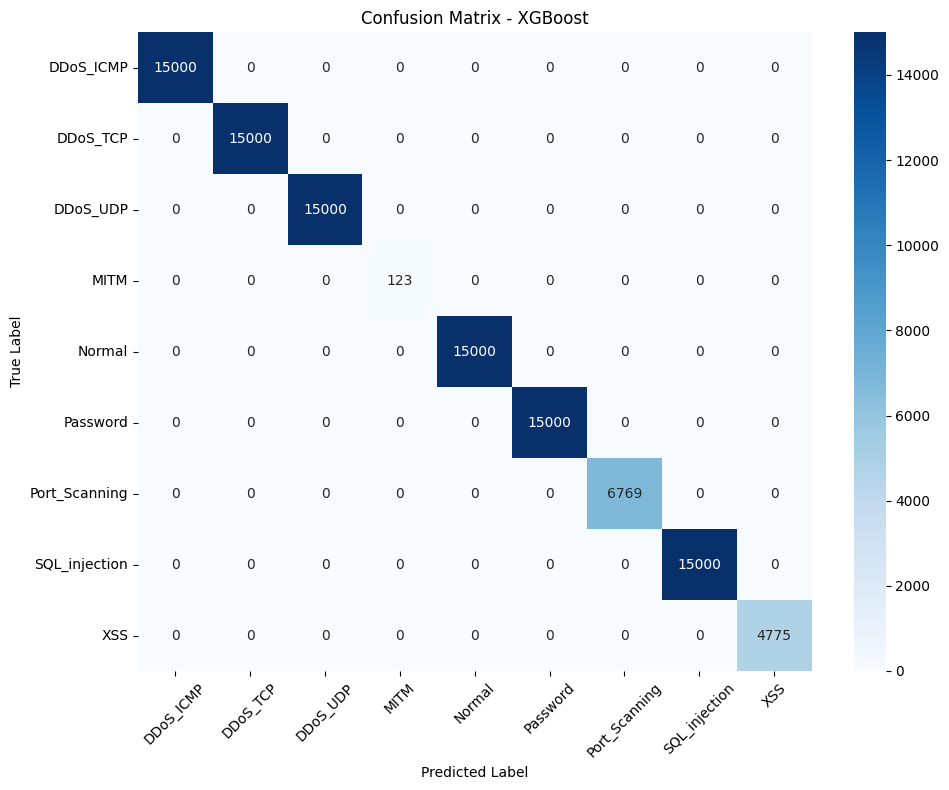

In [38]:
class_names = [
    "DDoS_ICMP", "DDoS_TCP", "DDoS_UDP", "MITM",
    "Normal", "Password", "Port_Scanning", "SQL_injection", "XSS"
]

model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"✅ دقة التدريب: {train_acc:.4f}")
print(f"✅ دقة الاختبار: {test_acc:.4f}")
print("📊 تقرير الأداء:\n", classification_report(y_test, y_test_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [39]:
with open("Attack _Network_modelGB.pkl", "wb") as file:
    pickle.dump(model, file)

print("🚀  Attack _Network_modelGB.pkl")

🚀  Attack _Network_modelGB.pkl
